In [10]:
from mazeAgentUtils import * 
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions
   initialising STDP weight matrix and traces


(<Figure size 3600x180 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe75a692438>)

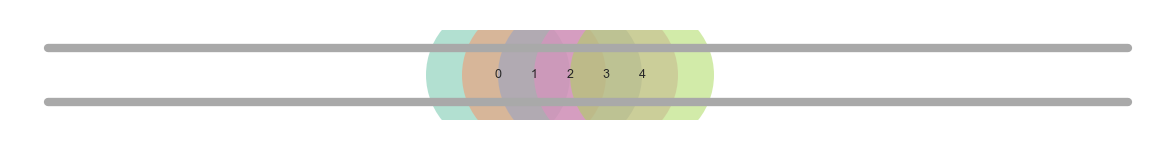

In [13]:
N=5
xcen = np.linspace(1.25,1.75,N+1)[:-1]
ycen = np.array([0.075]*N)
centres = np.vstack((xcen,ycen)).T

# centres = np.vstack((agent.centres,agent.centres,agent.centres))
# sigmas = np.array([0.8]*30 + [0.4]*30 + [0.2]*30)


params = { 
          'mazeType'           : 'loop',  #type of maze, define in getMaze() function
          'stateType'          : 'gaussianThreshold', #feature on which to TD learn (onehot, gaussian, gaussianCS, fourier, circles)
          'movementPolicy'     : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'           : 3,          #maze size scaling parameter, metres
          'dt'                 : 0.005,       #simulation time disretisation 
          'dx'                 : 0.03,       #space discretisation (for plotting, movement is continuous)
          'tau'                : 5,          #TD decay time, seconds
          'TDdx'               : 0.02,       #rough distance between TD learning updates, metres 
          'alpha'              : 0.1,       #TD learning rate 
          'nCells'             : N,       #how many features to use
          'cellFiringRate'     : 10,         #peak firing rate of a cell (middle of place field, preferred theta phase)
          'centres'            : centres,       #array of receptive field positions. Overwrites nCells
          'speedScale'         : 0.16,       #movement speed scale, metres/second
          'rotSpeedScale'      : None,       #rotational speed scale, radians/second
          'initPos'            : None,       #initial position [x0, y0], metres
          'initDir'            : None,       #initial direction, unit vector
          'sigma'              : np.array([0.2]*N),        #feature cell width scale, relevant for  gaussin, gaussianCS, circles
          'doorsClosed'        : False,       #whether doors are opened or closed in multicompartment maze

}


agent =  MazeAgent(params)
agent.toggleDoors(params['doorsClosed'])
plotter = Visualiser(agent)
plotter.plotFeatureCells()
# plotter.plotM()

  0%|          | 0/240000 [00:00<?, ?it/s]

Calculating place and grid cells


(<Figure size 600x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc220e4d4a8>)

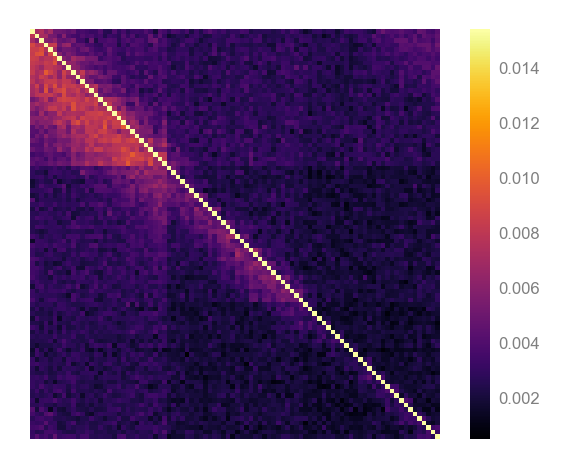

In [46]:
agent.pos = np.array([0.75,0.075])
agent.dir = np.array([1,0])
agent.runRat(trainTime=20,STDPLearn=True,TDSRLearn=False,saveEvery=1)

plotter = Visualiser(agent)
plotter.plotM(STDP=True)

(<Figure size 1500x300 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc223a49358>)

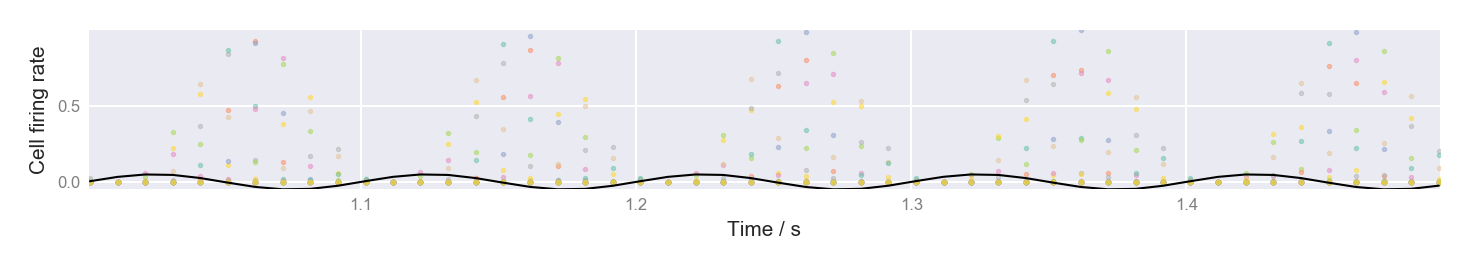

In [26]:
plotter = Visualiser(agent)
# plotter.plotSTDPFiringRates(starttime=0,endtime=16/60)
plotter.plotSTDPFiringRates(starttime=1/60,endtime=1.5/60)
# plotter.plotSTDPFiringRates(starttime=12/60,endtime=12.2/60)

In [36]:
[0.8]*30 + [0.4]*30


[0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4]

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.11539141 0.32663909 0.5179573
  0.67835593 0.79801153 0.86926008 0.88740871 0.85124706 0.76318083
  0.62896701 0.45709132 0

(<Figure size 3600x180 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc201625c18>)

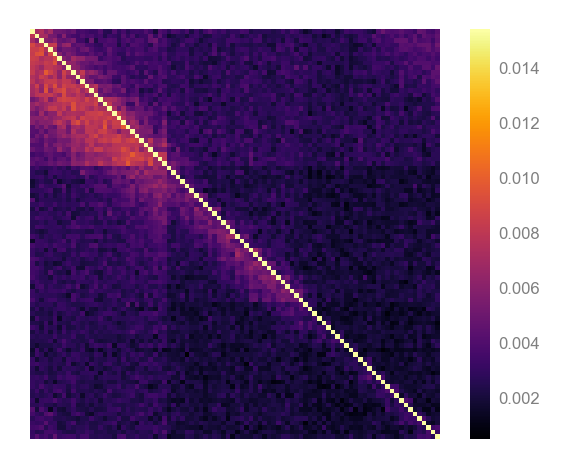

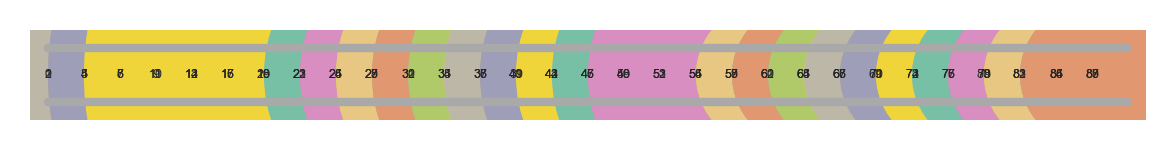

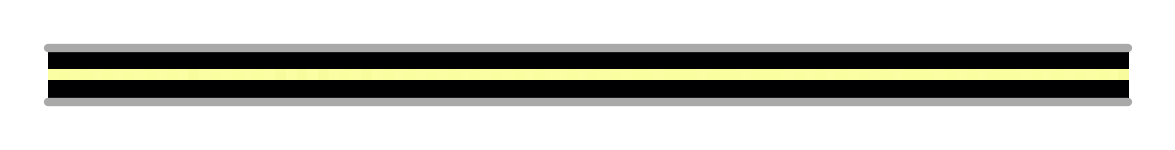

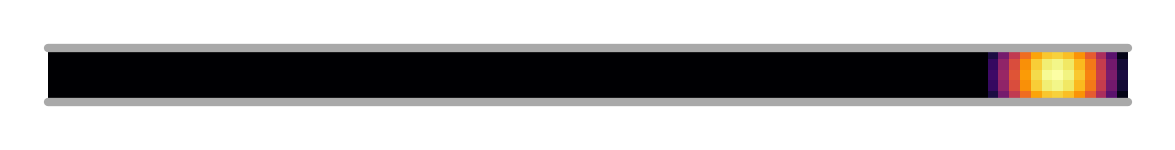

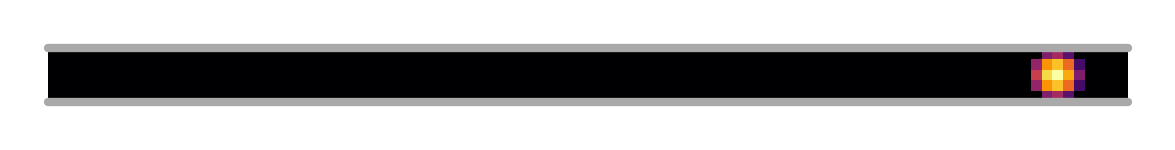

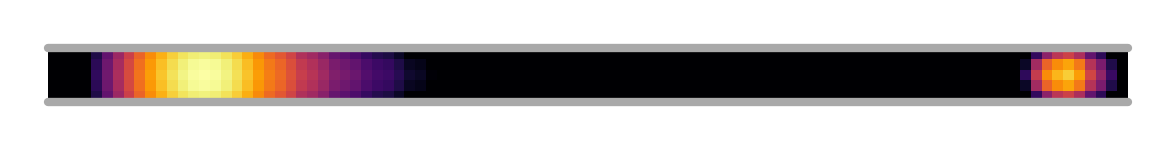

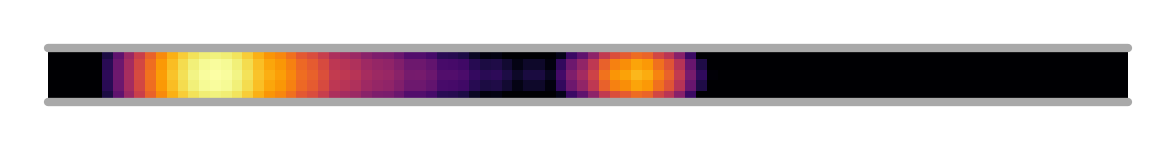

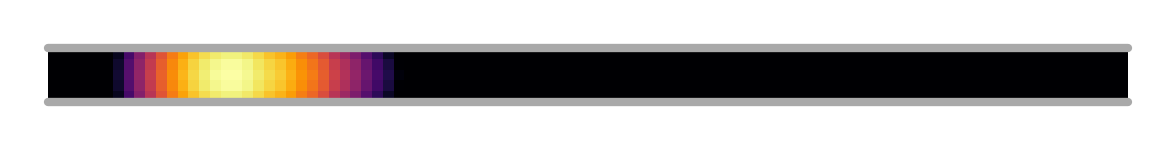

In [47]:
agent.placeCellThreshold=0.2
plotter = Visualiser(agent)

plotter.plotM(STDP=True)
fig, ax = plotter.plotFeatureCells()

# plotter.plotPlaceFields()
# plotter.plotTrajectory(starttime=(agent.t/60)-10,endtime=(agent.t/60))
# plotter.plotTrajectory(starttime = 0, endtime=20, fig=fig, ax=ax)
plotter.plotHeatMap()


plotter.plotReceptiveField(number=-5)
plotter.plotPlaceField(number=-5,time=0)
plotter.plotPlaceField(number=-5,plotTimeStamp=False,STDP=True)
plotter.plotPlaceField(number=-35,plotTimeStamp=False,STDP=True)
plotter.plotPlaceField(number=-65,plotTimeStamp=False,STDP=True)

# plotter.plotReceptiveField(number=50)

# plotter.plotGridField(number='many',STDP=True)

# plotter.animateField(field='M',interval=200)
# plotter.animateField(field='place',number=-10,interval=200)



In [12]:
# W = agent.W
agent.W = W

In [14]:
plotter = Visualiser(agent)
plotter.plotPlaceField(STDP=True,number=-1)

AttributeError: 'float' object has no attribute 'T'